In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import re
import os, json
from textwrap import dedent
from pprint import pprint

import warnings
warnings.filterwarnings("ignore")

In [3]:
from typing import TypedDict

class MenuState(TypedDict):
    user_preference: str
    recommended_menu: str
    menu_info:str

In [4]:
import random

def get_user_preference(state: MenuState) -> MenuState:
    print("---랜덤 사용자 선호도 생성---")
    preferences = ['육류', '해산물', '채식', '아무거나']
    preference = random.choice(preferences)
    print(f"생상된 선호도: {preference}")
    return {"user_preference": preference}

def recommend_menu(state: MenuState) -> MenuState:
    print("---메뉴 추천---")
    preference = state['user_preference']
    if preference == "육류":
        menu = "스테이크"
    elif preference == "해산물":
        menu = "랍스터 파스타타"
    elif preference == "채식":
        menu = "그린 샐러드"
    else:
        menu = "오늘의 쉐프 특선"
    print(f"추천 메뉴: {menu}")
    return {"recommended_menu": menu}

def provide_menu_info(state: MenuState) -> MenuState:
    print("---메뉴 정보 제공---")
    menu = state["recommended_menu"]
    if menu == "스테이크":
        info = "최상급 소고기로 만든 juicy한 스테이크입니다. 가격: 30,000"
    elif menu == "랍스터 파스타":
        info = "신선한 랍스터와 al dante 파스타의 조화. 가격 28,000"
    elif menu == "그린 샐러드":
        info = "신선한 유기농 채소로 만든 건강한 샐러드. 가격: 15,000원"
    else:
        info = "쉐프가 그날그날 엄선한 특별 요리입니다. 가격: 35,000원"
    print(f"메뉴 정보: {info}")
    return {"menu_info": info}

In [5]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(MenuState)

builder.add_node("get_preference", get_user_preference)
builder.add_node("recommend", recommend_menu)
builder.add_node("provide_info", provide_menu_info)

builder.add_edge(START, "get_preference")
builder.add_edge("get_preference", "recommend")
builder.add_edge("recommend", "provide_info")
builder.add_edge("provide_info", END)

graph = builder.compile()

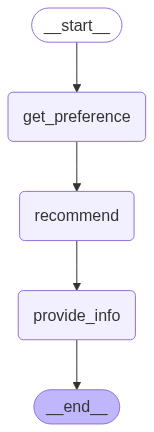

In [6]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
def print_result(result: MenuState):
    print("\n=== 결과 ===")
    print("선호도:", result['user_preference'])
    print("추천 메뉴:", result['recommended_menu'])
    print("메뉴 정보:", result['menu_info'])
    print("============\n")


# 초기 입려
inputs = {"user_preference": ""}

# 여러 번 실행하여 테스트 
for _ in range(2):
    result = graph.invoke(inputs)
    print_result(result)
    print("*"*100)
    print()

---랜덤 사용자 선호도 생성---
생상된 선호도: 해산물
---메뉴 추천---
추천 메뉴: 랍스터 파스타타
---메뉴 정보 제공---
메뉴 정보: 쉐프가 그날그날 엄선한 특별 요리입니다. 가격: 35,000원

=== 결과 ===
선호도: 해산물
추천 메뉴: 랍스터 파스타타
메뉴 정보: 쉐프가 그날그날 엄선한 특별 요리입니다. 가격: 35,000원

****************************************************************************************************

---랜덤 사용자 선호도 생성---
생상된 선호도: 채식
---메뉴 추천---
추천 메뉴: 그린 샐러드
---메뉴 정보 제공---
메뉴 정보: 신선한 유기농 채소로 만든 건강한 샐러드. 가격: 15,000원

=== 결과 ===
선호도: 채식
추천 메뉴: 그린 샐러드
메뉴 정보: 신선한 유기농 채소로 만든 건강한 샐러드. 가격: 15,000원

****************************************************************************************************

